# Regression Analysis for Prediction of Auto Insurance Monthly Premiums 

## Import Packages

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns
import scipy.stats
import scipy.optimize
import scipy.spatial
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib
import statsmodels
import pymc3 as pm
from IPython import display
from ipywidgets import interact, widgets
import re
import mailbox
import csv
import math
import io
%matplotlib inline
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
import seaborn as seabornInstance
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

## Load Data

In [429]:
df=pd.read_csv('Auto_Insurance_Dataset.csv', low_memory=False)
data=df.drop(['Customer','StateCode','EffectiveToDate','MonthsSinceLastClaim',
              'MonthsSincePolicyInception','NumberofOpenComplaints',
              'NumberofPolicies'],axis=1)
data.head()

,State,ClaimAmount,Response,Coverage,Education,EmploymentStatus,Gender,Income,LocationCode,MaritalStatus,MonthlyPremiumAuto,PolicyType,Policy,ClaimReason,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
State                 9134 non-null object
ClaimAmount           9134 non-null float64
Response              9134 non-null object
Coverage              9134 non-null object
Education             9134 non-null object
EmploymentStatus      9134 non-null object
Gender                9134 non-null object
Income                9134 non-null int64
LocationCode          9134 non-null object
MaritalStatus         9134 non-null object
MonthlyPremiumAuto    9134 non-null int64
PolicyType            9134 non-null object
Policy                9134 non-null object
ClaimReason           9134 non-null object
SalesChannel          9134 non-null object
TotalClaimAmount      9134 non-null float64
VehicleClass          9134 non-null object
VehicleSize           9134 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 1.3+ MB


In [431]:
data.describe()

,ClaimAmount,Income,MonthlyPremiumAuto,TotalClaimAmount
count,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,434.088794
std,687.096761,30379.904734,34.407967,290.500092
min,189.800768,0.000000,61.000000,0.099007
25%,399.425179,0.000000,68.000000,272.258244
50%,578.018220,33889.500000,83.000000,383.945434
75%,896.216704,62320.000000,109.000000,547.514839
max,8332.538119,99981.000000,298.000000,2893.239678


## Functions

In [432]:
def sc(data):
    return 1e-5*data.Income,data.State.map({'Iowa':'skyblue','Kansas':'gold',
                         'Nebraska':'palegreen','Missouri':'coral','Oklahoma':'red'})
def plotdata(data=df):
    size,colors=sc(data)
    data.plot.scatter('TotalClaimAmount','MonthlyPremiumAuto',c=colors,s=size,
                       linewidths=0.5,edgecolor='k',alpha=0.5)
def plotfit(fit,data=df):
    plotdata(data)
    size,colors=sc(data)
    plt.scatter(data.Income,fit.predict(data),c=colors,s=30,
               linewidths=0.5,edgecolor='k',marker='D')

def cross_validate(data,formula,response,n=100):
    ret=[]
    for i in range(n):
        shuffled=data.sample(len(data))
        training,testing= shuffled.iloc[:len(data)//2],shuffled.iloc[len(data)//2:]
        trained=smf.ols(formula,data=training).fit()
        resid=trained.predict(testing)-testing[response]
        df=len(testing)-trained.df_model-1
        mse=np.sum(resid**2)/df
        ret.append(mse)
        return np.mean(ret)


## Numerical Variables

#### Model 1

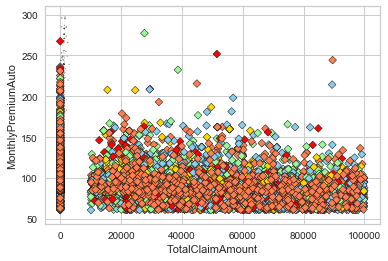

In [433]:
model_1=smf.ols(formula="MonthlyPremiumAuto~TotalClaimAmount",data=df).fit()
plotfit(model_1,df)

In [434]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MonthlyPremiumAuto   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     6074.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:07:07   Log-Likelihood:                -42950.
No. Observations:                9134   AIC:                         8.590e+04
Df Residuals:                    9132   BIC:                         8.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           60.7240      0.502    121.038      0.000      59.741      61.707
TotalClaimAmount     0.0749      0.001     77.935      0.000       0.073       0.077
==============================================================================
Omnibus:                     2938.528   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11340.832
Skew:                           1.569   Prob(JB):                         0.00
Kurtosis:                       7.467   Cond. No.                         939.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

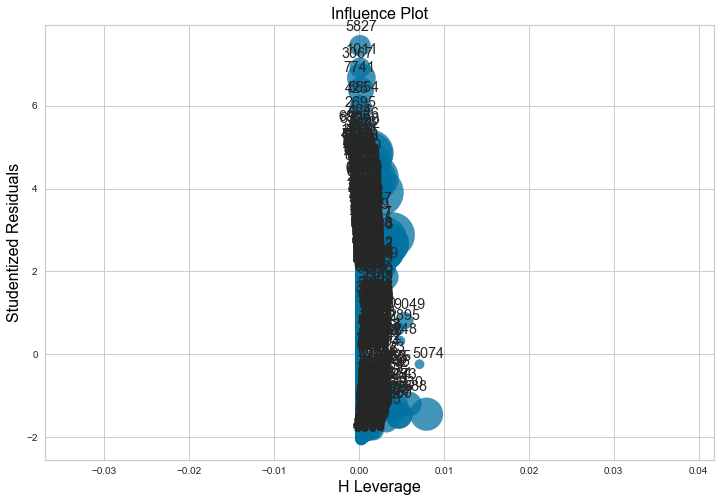

In [435]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model_1, ax=ax, criterion="cooks")

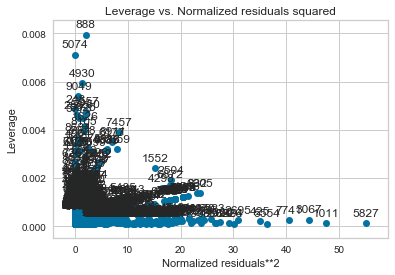

In [437]:
fig = sm.graphics.plot_leverage_resid2(model_1, ax=ax)

#### Model 2

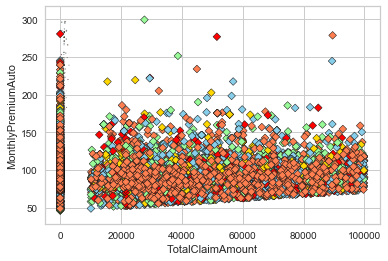

In [438]:
model_2=smf.ols(formula="MonthlyPremiumAuto~TotalClaimAmount+Income",data=df).fit()
plotfit(model_2,df)

In [439]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MonthlyPremiumAuto   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3719.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:08:36   Log-Likelihood:                -42558.
No. Observations:                9134   AIC:                         8.512e+04
Df Residuals:                    9131   BIC:                         8.514e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           46.2331      0.698     66.229      0.000      44.865      47.602
TotalClaimAmount     0.0849      0.001     86.214      0.000       0.083       0.087
Income               0.0003   9.41e-06     28.623      0.000       0.000       0.000
==============================================================================
Omnibus:                     2789.708   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10541.426
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                       7.336   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

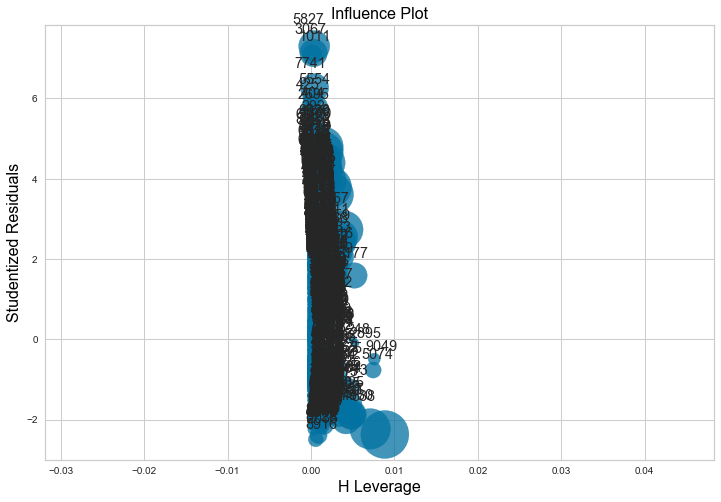

In [440]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model_2, ax=ax, criterion="cooks")

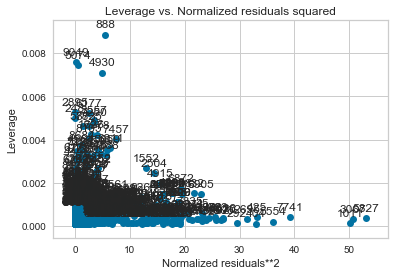

In [441]:
fig = sm.graphics.plot_leverage_resid2(model_2, ax=ax)

#### Model 3

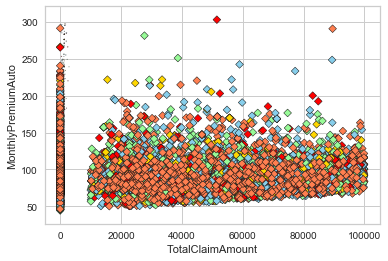

In [442]:
model_3=smf.ols(formula="MonthlyPremiumAuto~TotalClaimAmount+Income+ClaimAmount",
                data=df).fit()
plotfit(model_3,df)

In [443]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MonthlyPremiumAuto   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3099.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:10:22   Log-Likelihood:                -42072.
No. Observations:                9134   AIC:                         8.415e+04
Df Residuals:                    9130   BIC:                         8.418e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           41.0806      0.681     60.304      0.000      39.745      42.416
TotalClaimAmount     0.0771      0.001     79.941      0.000       0.075       0.079
Income               0.0002   8.99e-06     26.299      0.000       0.000       0.000
ClaimAmount          0.0122      0.000     32.017      0.000       0.011       0.013
==============================================================================
Omnibus:                     2591.064   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9665.689
Skew:                           1.383   Prob(JB):                         0.00
Kurtosis:                       7.213   Cond. No.                     1.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [444]:
cross_validate(df,"MonthlyPremiumAuto~TotalClaimAmount+Income+ClaimAmount",'MonthlyPremiumAuto')

579.5136661308554

In [445]:
model_3.mse_resid

586.7919572493273

In [446]:
model_3.params

Intercept           41.080578
TotalClaimAmount     0.077099
Income               0.000236
ClaimAmount          0.012208
dtype: float64

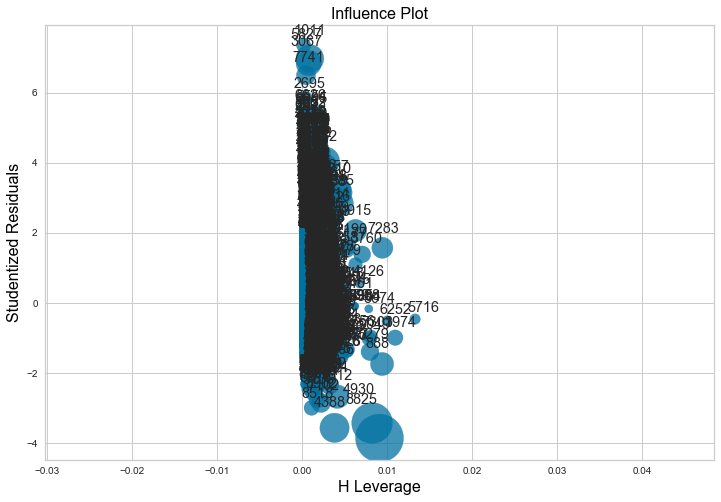

In [447]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model_3, ax=ax, criterion="cooks")

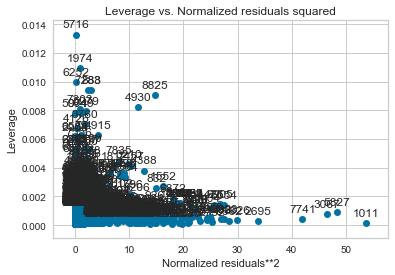

In [448]:
fig = sm.graphics.plot_leverage_resid2(model_3, ax=ax)

## Preprocessing for Regression

In [503]:
data_dummy=pd.get_dummies(data)
data_dummy.describe()

,ClaimAmount,Income,MonthlyPremiumAuto,TotalClaimAmount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,Response_No,...,SalesChannel_Web,VehicleClass_Four-Door Car,VehicleClass_Luxury Car,VehicleClass_Luxury SUV,VehicleClass_SUV,VehicleClass_Sports Car,VehicleClass_Two-Door Car,VehicleSize_Large,VehicleSize_Medsize,VehicleSize_Small
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,434.088794,0.284760,0.087366,0.344865,0.186446,0.096562,0.856799,...,0.145062,0.505912,0.017845,0.020145,0.196628,0.052989,0.206481,0.103569,0.703306,0.193125
std,687.096761,30379.904734,34.407967,290.500092,0.451325,0.282386,0.475350,0.389488,0.295377,0.350297,...,0.352183,0.499992,0.132397,0.140502,0.397470,0.224023,0.404802,0.304717,0.456825,0.394772
min,189.800768,0.000000,61.000000,0.099007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,399.425179,0.000000,68.000000,272.258244,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,578.018220,33889.500000,83.000000,383.945434,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,896.216704,62320.000000,109.000000,547.514839,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,8332.538119,99981.000000,298.000000,2893.239678,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model 4

In [519]:
model4=sm.OLS(target,features).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MonthlyPremiumAuto   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     5496.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:18:35   Log-Likelihood:                -29993.
No. Observations:                9104   AIC:                         6.008e+04
Df Residuals:                    9059   BIC:                         6.040e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ClaimAmount                        0.0008      0.000      6.929      0.000       0.001       0.001
Income                          7.425e-06   4.02e-06      1.845      0.065   -4.62e-07    1.53e-05
TotalClaimAmount                   0.0115      0.000     23.925      0.000       0.011       0.012
State_Iowa                         7.0488      0.128     55.100      0.000       6.798       7.300
State_Kansas                       7.0252      0.200     35.202      0.000       6.634       7.416
State_Missouri                     6.8947      0.121     56.791      0.000       6.657       7.133
State_Nebraska                     6.7358      0.148     45.576      0.000       6.446       7.026
State_Oklahoma                     6.8454      0.191     35.810      0.000       6.471       7.220
Response_No                       17.2255      0.116    148.289      0.000      16.998      17.453
Response_Yes                      17.3245      0.127    136.397      0.000      17.075      17.573
Coverage_Basic                   -10.1302      0.107    -94.848      0.000     -10.340      -9.921
Coverage_Extended                  9.3820      0.118     79.374      0.000       9.150       9.614
Coverage_Premium                  35.2982      0.193    183.295      0.000      34.921      35.676
Education_Bachelor                 6.7700      0.138     49.126      0.000       6.500       7.040
Education_College                  6.7212      0.138     48.817      0.000       6.451       6.991
Education_Doctor                   7.4878      0.295     25.353      0.000       6.909       8.067
Education_High School or Below     6.3866      0.142     44.931      0.000       6.108       6.665
Education_Master                   7.1844      0.213     33.802      0.000       6.768       7.601
EmploymentStatus_Disabled          6.8898      0.286     24.111      0.000       6.330       7.450
EmploymentStatus_Employed          7.2751      0.196     37.096      0.000       6.891       7.660
EmploymentStatus_Medical Leave     7.1660      0.277     25.853      0.000       6.623       7.709
EmploymentStatus_Retired           6.8639      0.345     19.870      0.000       6.187       7.541
EmploymentStatus_Unemployed        6.3552      0.198     32.128      0.000       5.967       6.743
Gender_F                          17.5485      0.087    202.134      0.000      17.378      17.719
Gender_M                          17.0015      0.091    187.289      0.000      16.824      17.179
LocationCode_Rural                13.6678      0.149     91.509      0.000      13.375      13.961
LocationCode_Suburban              9.7163      0.154     62.902      0.000       9.414      10.019
LocationCode_Urban                11.1658      0.141     79.355      0.000      10.890      11.442
MaritalStatus_

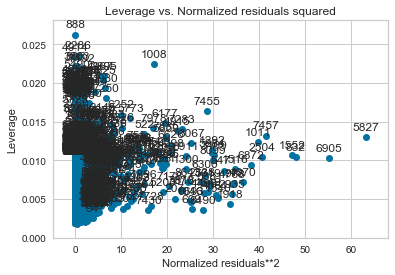

In [516]:

fig = sm.graphics.plot_leverage_resid2(model4, ax=ax)

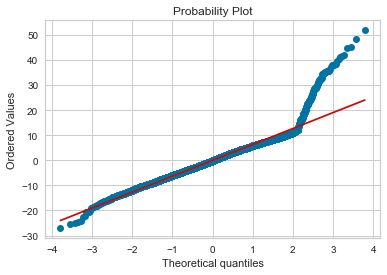

In [517]:
import pylab
stats.probplot(model4.resid, dist="norm", plot=pylab)
pylab.show()

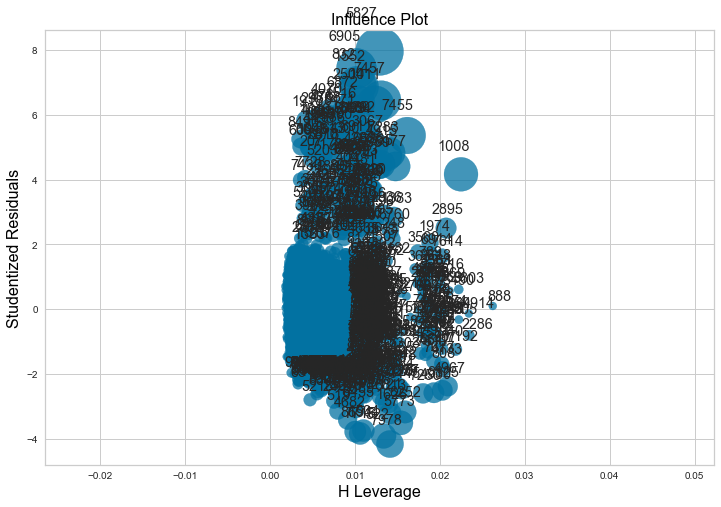

In [509]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model4, ax=ax, criterion="cooks")

### Outliers

In [518]:
data_dummy=data_dummy.drop(data_dummy.index[5827])
data_dummy=data_dummy.drop(data_dummy.index[6905])
data_dummy=data_dummy.drop(data_dummy.index[1552])
data_dummy=data_dummy.drop(data_dummy.index[1011])
data_dummy=data_dummy.drop(data_dummy.index[7457])
data_dummy=data_dummy.drop(data_dummy.index[868])
data_dummy=data_dummy.drop(data_dummy.index[2504])
data_dummy=data_dummy.drop(data_dummy.index[7455])
data_dummy=data_dummy.drop(data_dummy.index[1008])
data_dummy=data_dummy.drop(data_dummy.index[2895])
data_dummy=data_dummy.drop(data_dummy.index[6914])
data_dummy=data_dummy.drop(data_dummy.index[3560])
data_dummy=data_dummy.drop(data_dummy.index[7614])
data_dummy=data_dummy.drop(data_dummy.index[6813])
data_dummy=data_dummy.drop(data_dummy.index[4967])
data_dummy=data_dummy.drop(data_dummy.index[4561])
data_dummy=data_dummy.drop(data_dummy.index[4971])
data_dummy=data_dummy.drop(data_dummy.index[2439])
data_dummy=data_dummy.drop(data_dummy.index[6905])
data_dummy=data_dummy.drop(data_dummy.index[5827])
data_dummy=data_dummy.drop(data_dummy.index[1974])

## Multiple Linear Rigression



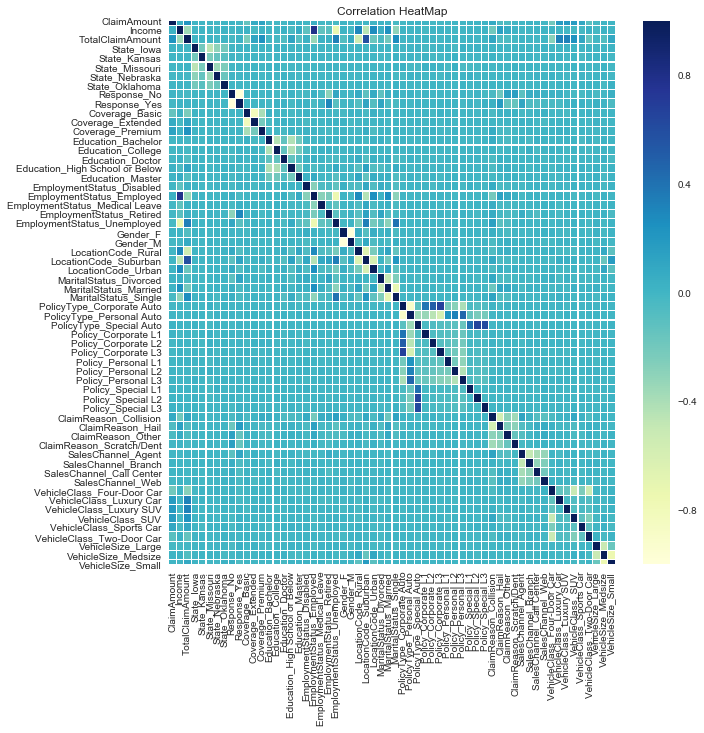

<Figure size 3600x3600 with 0 Axes>

In [511]:
corr = features.corr(method='pearson') 
#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=False, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.1, 
            vmin = -1, vmax=1, center=0,cmap="YlGnBu")
plt.title('Correlation HeatMap')
plt.figure(figsize=(50,50))
plt.tight_layout()
plt.show()

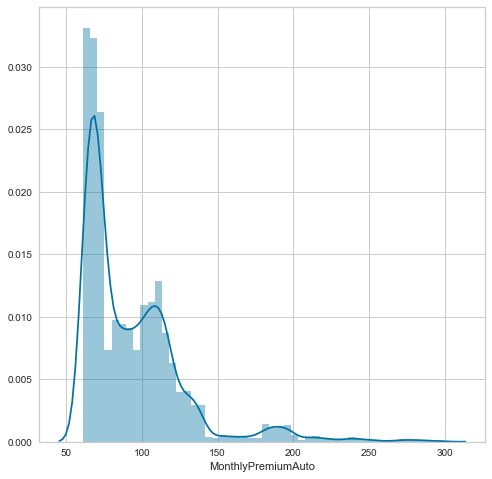

In [512]:
plt.figure(figsize=(8,8))
plt.tight_layout()
seabornInstance.distplot(data_dummy['MonthlyPremiumAuto'])

#### Model 4 Linear Regression (scikit-learn)

In [513]:
y=data_dummy.MonthlyPremiumAuto.values
X=data_dummy.drop('MonthlyPremiumAuto', axis=1).values
features=data_dummy.drop('MonthlyPremiumAuto', axis=1)
target=data_dummy.MonthlyPremiumAuto
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=42)

In [520]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [521]:
model_4=LinearRegression().fit(X_train_sc,y_train)

In [522]:
print('Estimated intercept:',model_4.intercept_)

Estimated intercept: 93.59062900979191


In [523]:
# The coefficients
pd.DataFrame({'features': features.columns , 'estimatedCoefficients': model_4.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,ClaimAmount,5.705866e-01
1,Income,1.785770e-01
2,TotalClaimAmount,3.468224e+00
3,State_Iowa,-3.918423e+13
4,State_Kansas,-2.495281e+13
5,State_Missouri,-4.178264e+13
6,State_Nebraska,-3.352213e+13
7,State_Oklahoma,-2.610846e+13
8,Response_No,1.158148e+12
9,Response_Yes,1.158148e+12


In [524]:
y_pred = model_4.predict(X_test_sc)

In [525]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('R squared value:',metrics.r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.977903053318409
Mean Squared Error: 43.13081808534549
R squared value: 0.9634395617729924
Root Mean Squared Error: 6.56740573478946


In [526]:
df_model_4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_model4=df_model_4.head(10)
df_model4

,Actual,Predicted
0,88,87.934379
1,105,109.785942
2,70,67.496879
3,88,87.825004
4,73,67.778129
5,70,66.629692
6,108,111.090629
7,116,109.989067
8,67,65.668754
9,63,66.559379


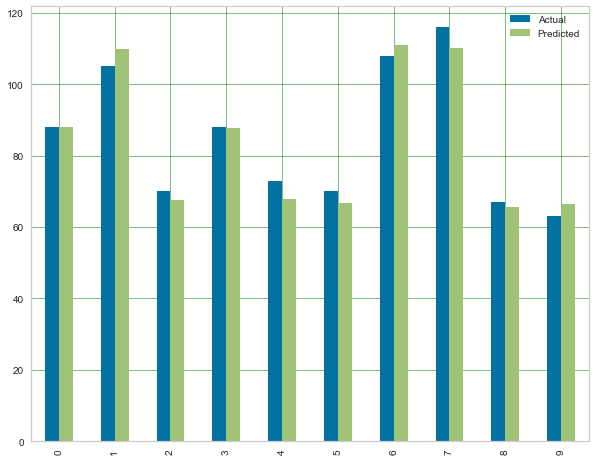

In [527]:
df_model4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [528]:
# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model_4q = LinearRegression().fit(X_train2, y_train)
print(mean_squared_error(y_test, model_4q.predict(X_test2)))

41.92494341202351


In [529]:
model_4q=LinearRegression().fit(X_train2,y_train)
y_pred_4q = model_4q.predict(X_test2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_4q))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_4q)) 
print('R squared value:',metrics.r2_score(y_test, y_pred_4q))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4q)))

Mean Absolute Error: 4.969709443547875
Mean Squared Error: 41.92494341202351
R squared value: 0.9644617382227009
Root Mean Squared Error: 6.47494736750991


In [530]:
df_model_4q = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_4q})
df_model4q=df_model_4q.head(10)
df_model4q

,Actual,Predicted
0,88,83.492075
1,105,108.908524
2,70,65.590339
3,88,86.311346
4,73,63.131300
5,70,66.147546
6,108,102.434904
7,116,112.383345
8,67,72.301184
9,63,67.966512


## Ridge Regression

#### Model 5

In [531]:
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0,100,1000])

In [532]:
model_5=regr_cv.fit(X_train_sc,y_train)

In [533]:
model_5.alpha_

1.0

In [534]:
print('Estimated intercept:',model_5.intercept_)

Estimated intercept: 93.53240571219331


In [535]:
y_pred_2 = model_5.predict(X_test_sc)

In [536]:
df_model_5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
df_model5=df_model_5.head(10)
df_model5

,Actual,Predicted
0,88,87.900503
1,105,109.566348
2,70,67.499078
3,88,87.832199
4,73,67.721568
5,70,66.546836
6,108,110.928149
7,116,110.030061
8,67,65.673753
9,63,66.274516


In [537]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_2)) 
print('R squared value:',metrics.r2_score(y_test, y_pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

Mean Absolute Error: 4.978995983872253
Mean Squared Error: 43.14059620560895
R squared value: 0.9634312732132633
Root Mean Squared Error: 6.568150135739054


## Lasso Regression

#### Model 6

In [538]:
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0,100,1000])

In [539]:
model_6=lasso_cv.fit(X_train_sc,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [540]:
model_6.alpha_

0.1

In [541]:
print('Estimated intercept:',model_6.intercept_)

Estimated intercept: 93.53240571219334


In [542]:
y_pred_3 = model_6.predict(X_test_sc)

In [543]:
df_model_6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3})
df_model6=df_model_6.head(10)
df_model6

,Actual,Predicted
0,88,87.358565
1,105,109.402005
2,70,67.544567
3,88,87.599397
4,73,67.143200
5,70,66.569622
6,108,111.549684
7,116,109.560058
8,67,66.159792
9,63,66.456179


In [544]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_3)) 
print('R squared value:',metrics.r2_score(y_test, y_pred_3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

Mean Absolute Error: 4.950986559575596
Mean Squared Error: 43.09960018240276
R squared value: 0.9634660240628997
Root Mean Squared Error: 6.565028574378238


## ElasticNet Regression

#### Model 7

In [545]:
enet_cv = ElasticNetCV(alphas=[0.1, 1.0, 10.0,100,1000])

In [546]:
model_7=enet_cv.fit(X_train_sc,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [547]:
model_7.alpha_

0.1

In [548]:
print('Estimated intercept:',model_7.intercept_)

Estimated intercept: 93.53240571219334


In [549]:
y_pred_4 = model_7.predict(X_test_sc)

In [550]:
df_model_7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_4})
df_model7=df_model_7.head(10)
df_model7

,Actual,Predicted
0,88,87.542720
1,105,108.856149
2,70,68.517436
3,88,88.087918
4,73,67.918722
5,70,67.037215
6,108,111.892004
7,116,108.370773
8,67,66.462174
9,63,66.593559


In [551]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_4)) 
print('R squared value:',metrics.r2_score(y_test, y_pred_4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))

Mean Absolute Error: 4.950136321705521
Mean Squared Error: 45.93665710990501
R squared value: 0.9610611532733124
Root Mean Squared Error: 6.777658674638685


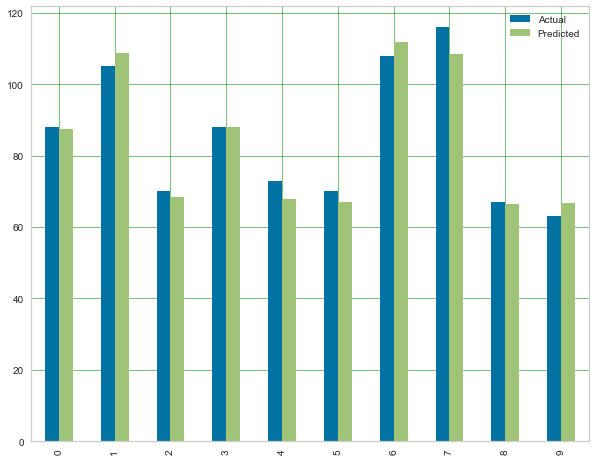

In [552]:
df_model7.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Residual Plots

In [553]:
def residual(modelCV):
    X, y = load_concrete()
    # Instantiate the linear model and visualizer
    model=modelCV
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train_sc, y_train)
    visualizer.score(X_test_sc, y_test)
    visualizer.show()


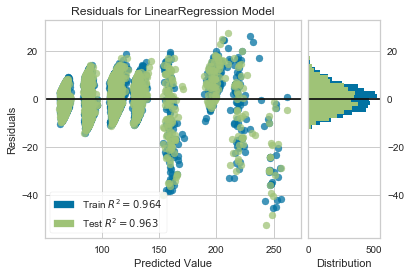

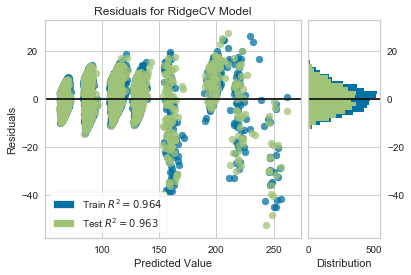

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


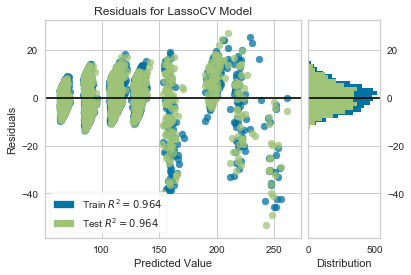

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


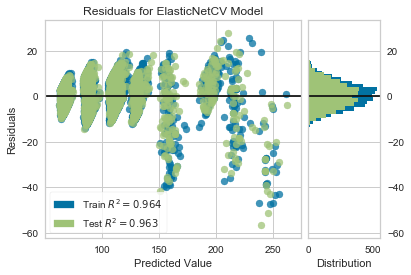

In [554]:
residual(LinearRegression())
residual(RidgeCV())
residual(LassoCV())
residual(ElasticNetCV())

## Residual Plot for Quadratic Linear Regression

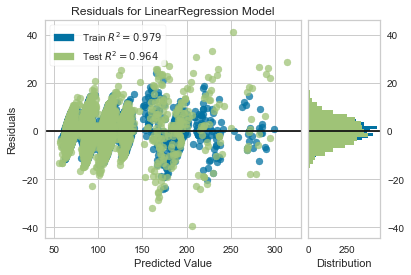

In [555]:
model_r4 = LinearRegression()
X, y = load_concrete()
visualizer_4q = ResidualsPlot(model_r4)
visualizer_4q.fit(X_train2, y_train)  
visualizer_4q.score(X_test2, y_test)
visualizer_4q.show()